## Homework 2: Deep Learning Foundation

### Obbjectives:
- Create sequential models
- Practice training deep learning models with PyTorch
- Learn how to use different techniques to fight with underfitting and overfitting
    - Model architecture: shallow vs. deep
    - Regularizers

Note, check `Lab 2: Overfitting_Underfitting` before you start working on this assignment. The lab should give you a good starting point.

### Description:  Classifying newswires: a multi-class classification

- In this assignment, we will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. 
- Since we have many classes and each data point should be classified into only one category, the problem is specifically an instance of <b>"single-label, multi-class classification"</b>. 

### The Reuters dataset

- _Reuters dataset_, is a set of short newswires and their topics, published by Reuters in 1986.  
- There are 46 different topics some topics are more represented than others, but each topic has at least 10 examples in the training set.
- The dataset can be loaded using the following script. Specifically, it retrieves 8,982 training examples and 2,246 test examples. The argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the data.

Note, here we only use Keras to download the dataset. Your deep learning model should be done by PyTorch.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import tensorflow.keras
from tensorflow.keras.datasets import reuters
import pandas as pd

from torchinfo import summary

import matplotlib.pyplot as plt

# add your import statement

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# show the sizes training/testing samples 
len(train_data)
len(test_data)

8982

2246

Each example is a list of integers, each corresponds to one word (word indices).  The following shows one example. Also, you can decode it back to words, in case you are curious:

In [ ]:
# show an example from the training dataset
print(train_data[10])

# retrieve the mapping from words to indices
word_index = reuters.get_word_index()

# reverse mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index[i - 3] for i in train_data[0] if (i-3) in reverse_word_index])

decoded_newswire

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


'said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45: a topic index. In total, there are `46` topics.


The code below shows the label for one sample and also the distribution of labels. This dataset is very imbalanced. Some labels only have a few training samples.

In [ ]:
train_labels[10]

# distribution of labels

pd.Series(train_labels).value_counts().sort_values(ascending = False)

3

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
6       48
28      48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
38      19
37      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64

### Prepare data
First, we'll follow the "bad-of-words" approach to generating sample representations. You can vectorize the data with the following code. Specifically,
- The training/test datasets is represented as a matrix
- Each sample is treated as a row, and each word is a column. 
- If a word (say $j$) appears in a sample (say $i$), 1 is recorded in the cell ($i, j$), and 0 otherwise.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Get Y ready
y_train = np.array(train_labels)
y_test = np.array(test_labels)

x_train.shape
x_test.shape

y_train.shape
y_test.shape

(8982, 10000)

(2246, 10000)

(8982,)

(2246,)

### Q1: Create seqential models in different architectures


- Create three different sequential models as defined below. Use `ReLu` activation function for all hidden layers.
    - Model A: This model only has one hidden layer with 128 units. 
    - Model B: Similar to A, but this model adds a 2nd hidden layer with 64 units.
    - Model C: This model is similar to Model B except that the 2nd hidden layer has 16 units.
    

- Define a function `fit_model(model, train_dataset, test_dataset, *other parameters if appropriate* )`, and use this function to train each model. You'll need to tune hyperparameters. To help you get started, suggested values for some parameters are provided:
    - optimizer: RMSProp optimizer or Adam
    - loss: `pick a right loss function` from this list: https://pytorch.org/docs/stable/nn.html#loss-functions             
    - batch_size: 256
    - epoch: 30
    - learning rate: 0.0002


- After each training epoch, calculate the loss and accuracy of each model on the test dataset (i.e. `x_test, y_test`)


- Return training history. Plot test loss and accuracy vs. epoches from the training histories of these three models
    - Reference plots are provided for your reference. You may generate different plots.
    - In general, the best test accuracy of this problem should not be lower than `75%`.


- Write your analysis (as markdowns) on the following: 
   - For each model, from which epoch, overfitting started happening?
   - Which model in general performs better than the others in terms of test loss or test accuracy? 
   - Please explain why this model outperforms the others

In [ ]:
# fix random number

random_seed = 124
seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

In [ ]:
# Create dataset class

class news_dataset(Dataset):
    
    # add your code

In [ ]:
# Define your models: A, B, C

class linear_model(nn.Module):
    
    
    def __init__(self):  # add more parameters if needed
        
       # add your code
    
    def forward(self, x):
        
        output = x
        
        # add your code
        
        return output

In [ ]:
# Define a train function


def train_model(model, train_dataset, test_dataset, device, epochs=50):  # add more parameters if needed
    
    train_history = None
    
    # add your code
  
    return train_history

In [ ]:
# Train Model A

# dataset
train_dataset = news_dataset(x_train, y_train)
test_dataset = news_dataset(x_test, y_test)

# load model
modela = linear_model()
summary(modela, (24, 10000))
hista = train_model(modela, train_dataset, test_dataset, device, epochs=50)

Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [24, 128]                 1,280,128
│    └─Linear: 2-2                       [24, 46]                  5,934
Total params: 1,286,062
Trainable params: 1,286,062
Non-trainable params: 0
Total mult-adds (M): 30.87
Input size (MB): 0.96
Forward/backward pass size (MB): 0.03
Params size (MB): 5.14
Estimated Total Size (MB): 6.14

Training Start
Epoch:1 / 50, train loss:2.50447 train_acc:0.56847, valid loss:1.90883 valid acc:0.62153
Epoch:2 / 50, train loss:1.61858 train_acc:0.67263, valid loss:1.55625 valid acc:0.66840
Epoch:3 / 50, train loss:1.31206 train_acc:0.71756, valid loss:1.38099 valid acc:0.68403
Epoch:4 / 50, train loss:1.12910 train_acc:0.74479, valid loss:1.27654 valid acc:0.70399
Epoch:5 / 50, train loss:1.02316 train_acc:0.77094, valid loss:1.19875 valid acc:0.71658
Epoch:6 / 50, train loss:0.93204 train_acc:0.79080, valid loss:1.14146 valid acc:0.73220
Epoch:7 / 50, train loss:0.86066 train_acc:0.80534, valid loss:1.10096 valid acc:0.74132
Epoch:8 / 50, train loss:0.77987 train_acc:0.82129, valid loss:1.06166 valid acc:0.75434
Epoch:9 / 50, train loss:0.72607 train_acc:0.83333, valid loss:1.02984 valid acc:0.75868
Epoch:10 / 50, train loss:0.66612 train_acc:0.84288, valid loss:0.99503 valid acc:0.76302
Epoch:11 / 50, train loss:0.62366 train_acc:0.85438, valid loss:0.97368 valid acc:0.76345
Epoc

In [ ]:
# Train Model B

# dataset
train_dataset = news_dataset(x_train, y_train)
test_dataset = news_dataset(x_test, y_test)

modelb = linear_model()
summary(modelb, (24, 10000))
histb = train_model(modelb, train_dataset, test_dataset, device, epochs = 50)

Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [24, 128]                 1,280,128
│    └─Linear: 2-2                       [24, 64]                  8,256
│    └─Linear: 2-3                       [24, 46]                  2,990
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
Total mult-adds (M): 30.99
Input size (MB): 0.96
Forward/backward pass size (MB): 0.05
Params size (MB): 5.17
Estimated Total Size (MB): 6.17

Training Start
Epoch:1 / 50, train loss:2.66254 train_acc:0.50304, valid loss:1.92919 valid acc:0.58681
Epoch:2 / 50, train loss:1.63426 train_acc:0.64399, valid loss:1.57192 valid acc:0.64540
Epoch:3 / 50, train loss:1.36719 train_acc:0.68837, valid loss:1.42369 valid acc:0.66710
Epoch:4 / 50, train loss:1.21565 train_acc:0.71365, valid loss:1.33877 valid acc:0.68403
Epoch:5 / 50, train loss:1.11870 train_acc:0.73318, valid loss:1.28153 valid acc:0.69097
Epoch:6 / 50, train loss:1.01302 train_acc:0.75163, valid loss:1.23188 valid acc:0.69878
Epoch:7 / 50, train loss:0.96438 train_acc:0.76823, valid loss:1.19370 valid acc:0.72135
Epoch:8 / 50, train loss:0.87985 train_acc:0.78668, valid loss:1.15158 valid acc:0.72569
Epoch:9 / 50, train loss:0.81390 train_acc:0.80132, valid loss:1.12761 valid acc:0.73047
Epoch:10 / 50, train loss:0.75328 train_acc:0.81380, valid loss:1.09677 valid acc:0.73220
Epoch:11 / 50, train loss:0.70880 train_acc:0.82281, valid loss:1.06107 valid acc:0.74392
Epoc

In [ ]:
# Train Model C

# dataset
train_dataset = news_dataset(x_train, y_train)
test_dataset = news_dataset(x_test, y_test)

modelc = linear_model()
summary(modelc, (24, 10000))
histc = train_model(modelc, train_dataset, test_dataset, device, epochs = 50)

Layer (type:depth-idx)                   Output Shape              Param #
linear_model                             --                        --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [24, 128]                 1,280,128
│    └─Linear: 2-2                       [24, 16]                  2,064
│    └─Linear: 2-3                       [24, 46]                  782
Total params: 1,282,974
Trainable params: 1,282,974
Non-trainable params: 0
Total mult-adds (M): 30.79
Input size (MB): 0.96
Forward/backward pass size (MB): 0.04
Params size (MB): 5.13
Estimated Total Size (MB): 6.13

Training Start
Epoch:1 / 50, train loss:3.06434 train_acc:0.43414, valid loss:2.40988 valid acc:0.54427
Epoch:2 / 50, train loss:2.02661 train_acc:0.58876, valid loss:1.86694 valid acc:0.60026
Epoch:3 / 50, train loss:1.65761 train_acc:0.63194, valid loss:1.66889 valid acc:0.61936
Epoch:4 / 50, train loss:1.46962 train_acc:0.65820, valid loss:1.54148 valid acc:0.65148
Epoch:5 / 50, train loss:1.34223 train_acc:0.67980, valid loss:1.46147 valid acc:0.65451
Epoch:6 / 50, train loss:1.23084 train_acc:0.69141, valid loss:1.40033 valid acc:0.66059
Epoch:7 / 50, train loss:1.17953 train_acc:0.70530, valid loss:1.36265 valid acc:0.66667
Epoch:8 / 50, train loss:1.11866 train_acc:0.71929, valid loss:1.31193 valid acc:0.67535
Epoch:9 / 50, train loss:1.03261 train_acc:0.73492, valid loss:1.28030 valid acc:0.68490
Epoch:10 / 50, train loss:0.98506 train_acc:0.74978, valid loss:1.25824 valid acc:0.68750
Epoch:11 / 50, train loss:0.93409 train_acc:0.76074, valid loss:1.22729 valid acc:0.70052
Epoc

Text(0.5, 1.0, 'Test loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

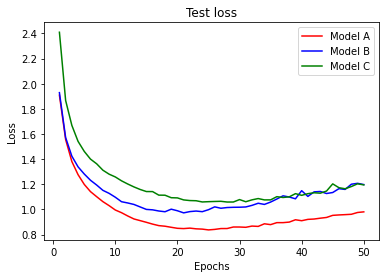

In [ ]:
# Plot test loss curves
epochs = range(1, len(hista['train_loss']) + 1)

plt.plot(epochs, hista['test_loss'], 'r-', label='Model A')
plt.plot(epochs, histb['test_loss'], 'b-', label='Model B')
plt.plot(epochs, histc['test_loss'], 'g-', label='Model C')

plt.title('Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Test Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

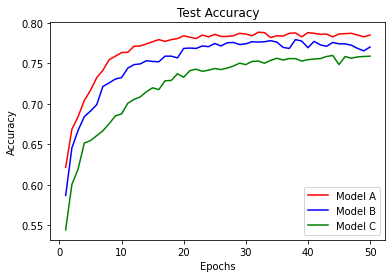

In [ ]:
# Plot test accuracy curves

epochs = range(1, len(hista['test_acc']) + 1)

plt.plot(epochs, hista['test_acc'], 'r-', label='Model A');
plt.plot(epochs, histb['test_acc'], 'b-', label='Model B');
plt.plot(epochs, histc['test_acc'], 'g-', label='Model C');

plt.title('Test Accuracy');
plt.xlabel('Epochs');
plt.ylabel('Accuracy');
plt.legend();

plt.show()

### Q2: Fight overfitting 
- Take the `best model` you achieved from Q1 and add regularizers in order to reduce or at least delay overfitting without hurting its classification accuracy. You can consider the following strategies:
    1. `dropout`: Add Dropout layers to input or hidden layers
    2. `Batch Normalization`: Add Batch Normalization layers after hidden layers.
    3. `L1/L2 Regularizer`: Add L2/L1 normal penality with appropriate coefficient.


- Pick one or a combination of strategies and modify the model


- Train the  model as in Q1 


- Plot test loss and test accuracy vs. epoches from the training histories of all the models.


- Write your analysis (as markdowns) on the following: 
   - Are you able to find a good strategy to address overfitting in this case? If so, why do you think the strategy you used can be effective?
   - What other strategies have you tried? Are they effective?
   - Overall, through Q1 and Q2, can you summarize what you have learned regarding modeling and training?
   - Note, this is an open question. Feel free to share you learning experience. We'll summarize all students' analyses and share them in class.
  

A reference plot is provided. However, depending on the strategy you choose, you may get a different plot.

In [ ]:
# Define model with regularizer
class linear_model_with_regularizer(nn.Module):
    
   # add your code here


In [ ]:
# Train model with regularizer

# dataset
train_dataset = news_dataset(x_train, y_train)
test_dataset = news_dataset(x_test, y_test)

modeld = linear_model_with_regularizer()

summary(modeld, (24, 10000))

histd = train_model(modeld, train_dataset, test_dataset, 
                     device, epochs = 50)

Text(0.5, 1.0, 'Test loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

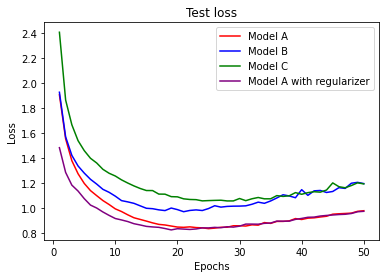

In [ ]:
# Plot validation loss curves
epochs = range(1, len(hista['train_loss']) + 1)

plt.plot(epochs, hista['test_loss'], 'r-', label='Model A')
plt.plot(epochs, histb['test_loss'], 'b-', label='Model B')
plt.plot(epochs, histc['test_loss'], 'g-', label='Model C')
plt.plot(epochs, histd['test_loss'], '-', color='purple', label='Model A with regularizer')

plt.title('Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Plot validation accuracy curves
epochs = range(1, len(hista['test_acc']) + 1)

plt.plot(epochs, hista['test_acc'], 'r-', label='Model A');
plt.plot(epochs, histb['test_acc'], 'b-', label='Model B');
plt.plot(epochs, histc['test_acc'], 'g-', label='Model C');
plt.plot(epochs, histd['test_acc'], '-', color='purple', label='Model A with regularizer');

plt.title('Test Accuracy');
plt.xlabel('Epochs');
plt.ylabel('Accuracy');
plt.legend();

plt.show()

### Q3 (Bonus): Imbalanced Dataset

Here we have a very imbalance dataset. Many classes only have a few training samples. As a result, when you display the classification report (see below), you'll see precision/recall/f1 is very low for some classes. 

Assuming that it is very difficult to collect extra samples, could you think of one method to improve the peformance of some underpresented classes without hurting the overall performance?

Implement your method and demonstrate the improvement you can achieve. 

Please describe your method as markdowns and explain why this method can address dataset skewness.

In [ ]:
# Classification report of Model in Q2

print(classification_report(Y, P))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.67      0.82      0.74       105
           2       0.78      0.70      0.74        20
           3       0.92      0.94      0.93       813
           4       0.84      0.89      0.86       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.72      0.76      0.74        38
           9       0.87      0.80      0.83        25
          10       0.96      0.87      0.91        30
          11       0.62      0.77      0.68        83
          12       0.50      0.23      0.32        13
          13       0.55      0.57      0.56        37
          14       1.00      0.50      0.67         2
          15       0.50      0.11      0.18         9
          16       0.68      0.76      0.71        99
          17       0.75    